## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#print(X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# Calling the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [2]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Accuracy: 0.9571534102044957
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Training the Decision Tree Regression model on the Training set

In [2]:
regressor = DecisionTreeRegressor(max_depth = 10,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2,
                                  random_state = 67)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=67)

## Create a KFold object with 5 splits 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.94263138 0.97525661 0.9873244  0.92513089 0.95542377]
0.9571534102044957


DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=67)

## Predicting the Test set results

In [4]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 21.5   20.56]
 [321.18 323.97]
 [118.45 114.25]
 [ 91.41  74.26]
 [287.43 293.22]
 [122.41 136.86]
 [100.19  99.  ]
 [127.82 138.  ]
 [350.23 385.24]
 [ 94.45 103.36]
 [132.18 148.77]
 [206.41 239.61]
 [ 88.04  90.43]
 [ 36.36  33.86]
 [206.41 170.01]
 [ 23.    27.91]
 [ 65.81  61.02]
 [ 36.36  22.34]
 [ 33.29   3.04]
 [ 65.81  71.26]
 [374.71 377.38]
 [ 76.62  79.63]
 [ 67.05  73.54]
 [ 38.11  40.54]
 [218.99 204.93]
 [ 33.29  28.38]
 [195.01 159.3 ]
 [ 76.62  74.79]
 [110.01 103.92]
 [ 65.09  65.63]
 [171.86 164.29]
 [ 54.9   52.29]
 [ 50.46  48.96]
 [  6.37   5.49]
 [145.73 151.27]
 [ 56.01  54.48]
 [110.08  96.38]
 [108.62 105.61]
 [ 64.2   64.6 ]
 [ 89.85  97.63]
 [ 47.6   51.99]
 [ 88.04  95.93]
 [285.   271.69]
 [121.53 118.52]
 [195.01 142.84]
 [136.61 124.71]
 [136.61 135.44]
 [ 32.81  24.41]
 [ 15.42  17.94]
 [350.23 367.34]
 [ 51.04  49.1 ]
 [122.41 136.91]
 [ 61.25  67.7 ]
 [229.72 202.75]
 [322.26 343.73]
 [ 90.94  85.17]
 [189.13 172.47]
 [191.53 179.97]
 [ 13.54  15.0

## Explanation

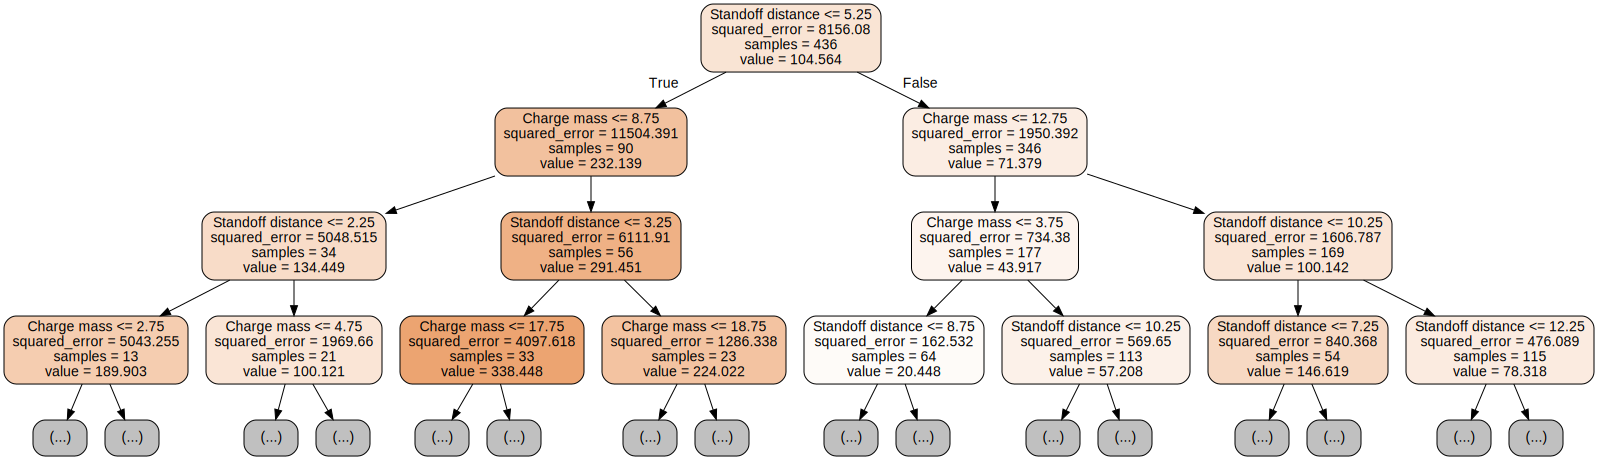

In [7]:
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(regressor,
                           max_depth = 3,
                           out_file=None,
                           feature_names=features,
                           label = 'all',
                           class_names=None,
                           rounded=True,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")
graph

In [8]:
import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(regressor,
                           out_file=None,
                           feature_names=features,
                           label = 'all',
                           class_names=None,
                           rounded=True,
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz_full")

'decision_tree_graphivz_full.png'

## Feature importance

In [9]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00045
Feature: 1, Score: 0.00271
Feature: 2, Score: 0.30339
Feature: 3, Score: 0.69346


In [10]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(regressor, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for j,k in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (j,k))

Feature: 0, Score: 10.46683
Feature: 1, Score: 70.57974
Feature: 2, Score: 5822.43990
Feature: 3, Score: 12628.51790
